# Initialize JlBox environment

In [1]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()

 Activating environment at `~/JlBox/Project.toml`


# Test JlBox (Optional)

In [2]:
Pkg.test("JlBox")

    Testing JlBox
Status `/tmp/jl_FzZwKK/Project.toml`
  [b99e7846] BinaryProvider v0.5.10
  [8f4d0f93] Conda v1.5.0
  [a93c6f00] DataFrames v0.22.4
  [2b5f629d] DiffEqBase v6.55.0
  [459566f4] DiffEqCallbacks v2.16.0
  [9fdde737] DiffEqOperators v4.20.0
  [6a86dc24] FiniteDiff v2.8.0
  [f6369f11] ForwardDiff v0.10.15
  [40713840] IncompleteLU v0.2.0
  [45866e21] JlBox v1.1.0 `~/JlBox`
  [9c8b4983] LightXML v0.9.0
  [1dea7af3] OrdinaryDiffEq v5.50.0
  [438e738f] PyCall v1.92.2
  [1fd47b50] QuadGK v2.4.1
  [ae029012] Requires v1.1.2
  [90137ffa] StaticArrays v1.0.1
  [c3572dad] Sundials v4.4.1
  [37e2e46d] LinearAlgebra
  [56ddb016] Logging
  [44cfe95a] Pkg
  [9e88b42a] Serialization
  [2f01184e] SparseArrays
  [8dfed614] Test
Status `/tmp/jl_FzZwKK/Manifest.toml`
  [c3fe647b] AbstractAlgebra v0.12.0
  [79e6a3ab] Adapt v3.1.1
  [ec485272] ArnoldiMethod v0.1.0
  [4fba245c] ArrayInterface v2.14.17
  [4c555306] ArrayLayouts v0.5.2
  [56f22d72] Artifacts v1.3.0
  [aae01518] BandedMatrices v

num_eqns: 836, num_reactants: 305
===============Gas Simulation Config===============
Mechanism file: /home/jovyan/JlBox/test/../data/MCM_APINENE.eqn.txt
Start time t0: 43200.0 s, Simulation time: 10800.0 s, Saving interval: 100.0 s
Temperature: 298.15 K, Relative Humidity: 50.0 %
Initial Condition (ppm): Dict("O3" => 18.0,"APINENE" => 30.0)
===================Solver Config===================
Using solver: CVODE_BDF{:Newton,:Dense,Nothing,Nothing}(0, 0, 0, false, 10, 5, 7, 3, 10, nothing, nothing, 0)
Using sparse jacobian: false
Reltol: 1.0e-6, Abstol: 0.001
DtInit: 1.0e-6 s, DtMax: 100.0 s
Positiveness detection: false
Jacobian method: gas
Current Iteration: 100, time_step: 0.019431135968163312
Current Iteration: 200, time_step: 6.6867435654465455
Current Iteration: 300, time_step: 200.0
Current Iteration: 400, time_step: 731.85902268746
Current Iteration: 500, time_step: 2371.7745973570172
Current Iteration: 600, time_step: 6376.453801747946
Current Iteration: 700, time_step: 9300.0


┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = ip:0x0
└ @ Core :-1


num_eqns: 836, num_reactants: 305
===============Gas Simulation Config===============
Mechanism file: /home/jovyan/JlBox/test/../data/MCM_APINENE.eqn.txt
Start time t0: 43200.0 s, Simulation time: 10800.0 s, Saving interval: 100.0 s
Temperature: 298.15 K, Relative Humidity: 50.0 %
Initial Condition (ppm): Dict("O3" => 18.0,"APINENE" => 30.0)
===================Solver Config===================
Using solver: CVODE_BDF{:Newton,:FGMRES,JlBox.var"#120#121",JlBox.var"#124#125"}(0, 0, 100, false, 10, 5, 7, 3, 10, JlBox.var"#120#121"(), JlBox.var"#124#125"(), 2)
Using sparse jacobian: true
Reltol: 1.0e-6, Abstol: 0.001
DtInit: 1.0e-6 s, DtMax: 100.0 s
Positiveness detection: false
Jacobian method: gas
Current Iteration: 100, time_step: 8.462188803434368e-6
Current Iteration: 200, time_step: 0.0010934775447996481
Current Iteration: 300, time_step: 0.09845505273451834
Current Iteration: 400, time_step: 0.7229192583477563
Current Iteration: 500, time_step: 11.947820830030873
Current Iteration: 60

    Testing JlBox tests passed 


# Gas phase simulation
- Simulation config:
    - Simulation period: 10800 seconds from midday 12:00
    - Simulation condition: temperature = 298.15K, solar declination angle = 23.79deg, latitude = 50deg
    - Initial condition: 18 ppm Ozone, 30 ppm Alpha-Pinene
- Solver config:
    - Solver: TRBDF2
    - Tolerance: relative tol = 1e-6, absolute tol = 1e-4
    - Time step: initial timestep = 1e-6, max timestep = 100.0
    - Jacobian: dense, analytical
- Output:
    - df: concentration of gases (unit: molecules/cc)

In [2]:
using JlBox, OrdinaryDiffEq
function configure_gas()
    file=joinpath(@__DIR__,"../data/MCM_APINENE.eqn.txt")#"MCM_test.eqn.txt"MCM_APINENE.eqn.txt"MCM_mixed_test.eqn.txt"MCM_ISOPRENE.eqn.txt
    temp=298.15 # Kelvin
    RH=0.5 # RH/100% [0 - 0.99]
    hour_of_day=12.0 # Define a start time  24 hr format
    start_time=hour_of_day*60*60 # seconds, used as t0 in solver
    simulation_time= 10800.0 # seconds
    batch_step=100.0 # seconds
    temp_celsius=temp-273.15
    Psat=610.78*exp((temp_celsius/(temp_celsius+238.3))*17.2694)# Saturation VP of water vapour, to get concentration of H20
    Pw=RH*Psat
    Wconc=0.002166*(Pw/(temp_celsius+273.16))*1.0e-6 #kg/cm3
    H2O=Wconc*(1.0/(18.0e-3))*6.0221409e+23#Convert from kg to molecules/cc
    Cfactor=2.55e+10 #ppb-to-molecules/cc
    reactants_initial_dict=Dict(["O3"=>18.0,"APINENE"=>30.0])#ppm ["O3"=>18.0,"APINENE"=>30.0])BUT1ENE"C5H8
    constant_dict=Dict([(:temp,temp),(:H2O,H2O)])
    dec=23.79
    lat=50.0
    photolysis_config=JlBox.DiurnalPhotolysisConfig(dec, lat)
    solver=TRBDF2(autodiff=false)
    #solver=Sundials.CVODE_BDF()
    reltol=1e-6
    abstol=1.0e-4
    dtinit=1e-6
    dtmax=100.0
    positiveness=false
    use_jacobian=true
    sparse=false
    config=JlBox.GasConfig(file,temp,RH,start_time,simulation_time,batch_step,
                       H2O,Cfactor,reactants_initial_dict,constant_dict,photolysis_config)
    solverconfig=JlBox.SolverConfig(solver,sparse,reltol,abstol,dtinit,dtmax,positiveness)
    config,solverconfig
end

config, solverconfig = configure_gas()
sol_gas, reactants2ind_gas, _ = JlBox.run_simulation(config, solverconfig);

num_eqns: 836, num_reactants: 305
===============Gas Simulation Config===============
Mechanism file: /home/jlboxuser/JlBox/example/../data/MCM_APINENE.eqn.txt
Start time t0: 43200.0 s, Simulation time: 10800.0 s, Saving interval: 100.0 s
Temperature: 298.15 K, Relative Humidity: 50.0 %
Initial Condition (ppm): Dict("O3" => 18.0,"APINENE" => 30.0)
===================Solver Config===================
Using solver: TRBDF2{0,false,DefaultLinSolve,NLNewton{Rational{Int64},Rational{Int64},Rational{Int64}},DataType}(DefaultLinSolve(nothing, nothing), NLNewton{Rational{Int64},Rational{Int64},Rational{Int64}}(1//100, 10, 1//5, 1//5), Val{:forward}, true, :linear, :PI)
Using sparse jacobian: false
Reltol: 1.0e-6, Abstol: 0.0001
DtInit: 1.0e-6 s, DtMax: 100.0 s
Positiveness detection: false
Jacobian method: gas
Current Iteration: 100, time_step: 0.21711844672608818
Current Iteration: 200, time_step: 1.115106198405492
Current Iteration: 300, time_step: 2.4176849257949025
Current Iteration: 400, ti

In [3]:
df = JlBox.postprocess_gas(sol_gas, reactants2ind_gas, config)
df[:,[:APINENE,:O3,:OH,:PINONIC]]

,APINENE,O3,OH,PINONIC
,Float64,Float64,Float64,Float64
1,7.65e11,4.59e11,0.0,0.0
2,7.59098e11,4.55721e11,6.53401e5,8.19336e7
3,7.53283e11,4.52491e11,6.48223e5,1.63245e8
4,7.47558e11,4.49308e11,6.42186e5,2.43993e8
5,7.41922e11,4.46172e11,6.36189e5,3.24314e8
6,7.36373e11,4.4308e11,6.30352e5,4.04277e8
7,7.30908e11,4.40033e11,6.24678e5,4.83923e8
8,7.25526e11,4.37028e11,6.1917e5,5.63283e8
9,7.20224e11,4.34066e11,6.13834e5,6.42381e8


## Plotting

Install `Plots` package

In [11]:
Pkg.add("Plots")

  Resolving package versions...
No Changes to `~/JlBox/Project.toml`
No Changes to `~/JlBox/Manifest.toml`
   Building GR → `~/.julia/packages/GR/RlE5Y/deps/build.log`


### Plot time series for Alpha-Pinene & PINONIC

Same result can be found in : https://github.com/loftytopping/PyBox/blob/master/images/Example_deafult_gas_simulation.png

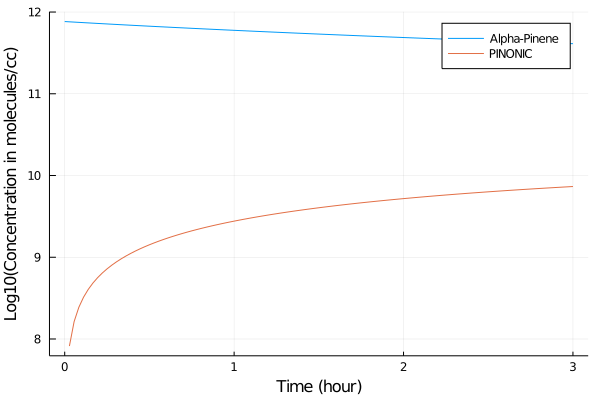

In [4]:
using Plots
Cfactor=2.55e+10 #ppb-to-molecules/cc
t_index = range(0, stop = 10800/3600, length = 109)
plot(t_index, log10.(df[!,:APINENE]), label = "Alpha-Pinene")
plot!(t_index, log10.(df[!,:PINONIC]), label = "PINONIC")
xlabel!("Time (hour)")
ylabel!("Log10(Concentration in molecules/cc)")

# Gas+Aerosol Simulation
- Simulation config:
    - Simulation period: 3600 seconds from midday 12:00
    - Simulation condition: temperature = 288.15K, solar declination angle = 23.79deg, latitude = 50deg
    - Initial condition: 18 ppm Ozone, 30 ppm Alpha-Pinene, 50% relative humidity
    - \# Size bins: 16
    - Nuclei profile: lognormal size distribution of 100 particles/cc, mean size = 0.2 um, size std = 2.2 um, lower size = 0.01 um, upper size = 1.0 um
    - Nuclei material: ammonium sulphate
- Solver config:
    - Solver: CVODE_BDF
    - Tolerance: relative tol = 1e-4, absolute tol = 1e-2
    - Time step: initial timestep = 1e-6, max timestep = 100.0
    - Jacobian: dense, analytical
- Output:
    - df_gas: concentration of gases (unit: molecules/cc)
    - df_SOA: Secondary Organic Aerosol mass (unit: ug/m3), and mass distribution for each size bin (unit: ug/m3)
    - df_size: Size bins (unit: m)

In [9]:
using JlBox
using Sundials

function configure_aerosol()
    file=joinpath(@__DIR__,"../data/MCM_APINENE.eqn.txt")#"MCM_test.eqn.txt"MCM_BCARY.eqn.txt
    temp=288.15 # Kelvin
    RH=0.5 # RH/100% [0 - 0.99]
    hour_of_day=12.0 # Define a start time  24 hr format
    start_time=hour_of_day*60*60 # seconds, used as t0 in solver
    simulation_time= 3600.0 # seconds
    batch_step=300.0 # seconds
    temp_celsius=temp-273.15
    Psat_w=610.78*exp((temp_celsius/(temp_celsius+238.3))*17.2694)# Saturation VP of water vapour, to get concentration of H20
    Pw=RH*Psat_w
    Wconc=0.002166*(Pw/(temp_celsius+273.16))*1.0e-6 #kg/cm3
    H2O=Wconc*(1.0/(18.0e-3))*6.0221409e+23#Convert from kg to molecules/cc
    Cfactor= 2.55e+10 #ppb-to-molecules/cc
    reactants_initial_dict=Dict(["O3"=>18.0,"APINENE"=>30.0,"H2O"=>H2O/Cfactor])#ppb BUT1ENE APINENE
    constant_dict=Dict([(:temp,temp)])
    dec=23.79
    lat=50.0
    photolysis_config=JlBox.DiurnalPhotolysisConfig(dec, lat)
    num_bins=16

    #Lognormal Distribution
    total_conc=100 #Total particles per cc
    size_std=2.2 #Standard Deviation
    lowersize=0.01 #microns
    uppersize=1.0 #microns
    meansize=0.2 #microns

    # - Specify the core material. 
    # This code is currently setup to consider *ammonium sulphate* as the core
    y_core_init=1.0e-3.+zeros(Float64,num_bins) #Will hold concentration of core material, only initialise here [molecules/cc] 
    core_density_array=1770.0.+zeros(Float64,num_bins) #[kg/m3] - need to make sure this matches core definition above
    core_mw=132.14.+zeros(Float64,num_bins) #[g/mol]
    core_dissociation=3.0 #Define this according to choice of core type. Please note this value might change

    vp_cutoff=-6.0
    sigma=72.0e-3 # Assume surface tension of water (mN/m) ???
    property_methods=Dict("bp"=>"joback_and_reid","vp"=>"nannoolal","critical"=>"nannoolal","density"=>"girolami")
    config=JlBox.AerosolConfig(file,temp,RH,start_time,simulation_time,batch_step,
                           H2O,Cfactor,reactants_initial_dict,constant_dict,photolysis_config,num_bins,
                           total_conc,size_std,lowersize,uppersize,meansize,y_core_init,
                           core_density_array,core_mw,core_dissociation,vp_cutoff,
                           sigma,property_methods)
    config
end

function configure_aerosol_solver_dense()
    solver=Sundials.CVODE_BDF()#OrdinaryDiffEq.TRBDF2(autodiff=false)
    sparse=false
    reltol=1e-4
    abstol=1.0e-2
    dtinit=1e-6
    dtmax=100.0
    positiveness=false
    diff_method="fine_analytical"
    solverconfig=JlBox.SolverConfig(solver,sparse,reltol,abstol,dtinit,dtmax,positiveness,diff_method)
    solverconfig
end

config = configure_aerosol()
solverconfig = configure_aerosol_solver_dense()
@time sol, reactants2ind, param_dict = JlBox.run_simulation(config, solverconfig);

num_eqns: 836, num_reactants: 305
num_reactants_condensed: 156
Dry core mass = 11.269128463820685
=============Aerosol Simulation Config=============
Mechanism file: /home/jlboxuser/JlBox/example/../data/MCM_APINENE.eqn.txt
Start time t0: 43200.0 s, Simulation time: 3600.0 s, Saving interval: 300.0 s
Temperature: 288.15 K, Relative Humidity: 50.0 %
Initial Condition (ppm): Dict("O3" => 18.0,"H2O" => 8.374434416160123e6,"APINENE" => 30.0)
Num_bins: 16, Vp_cutoff: -6.0 log10(Pa)
Property methods: Dict("vp" => "nannoolal","critical" => "nannoolal","density" => "girolami","bp" => "joback_and_reid")
===================Solver Config===================
Using solver: CVODE_BDF{:Newton,:Dense,Nothing,Nothing}(0, 0, 0, false, 10, 5, 7, 3, 10, nothing, nothing, 0)
Using sparse jacobian: false
Reltol: 0.0001, Abstol: 0.01
DtInit: 1.0e-6 s, DtMax: 100.0 s
Positiveness detection: false
Jacobian method: fine_analytical
Current Iteration: 10, time_step: 7.107753877348533e-7, SOA(ug/m3): 4.402105308191

In [11]:
df_gas = JlBox.postprocess_gas(sol, reactants2ind, config)
df_SOA = JlBox.postprocess_aerosol(sol, param_dict, config)
df_size = JlBox.postprocess_aerosol_size_dist(sol, param_dict, config)
df_SOA

,Time,SOA,Bin_1,Bin_2,Bin_3,Bin_4,Bin_5
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,1.74669e-6,1.31364e-5,8.48965e-5,0.000471473,0.00224997
2,300.0,0.0223211,1.78424e-6,1.33694e-5,8.60796e-5,0.000476444,0.0022673
3,600.0,0.156557,2.43256e-6,1.7114e-5,0.00010447,0.000553436,0.00254256
4,900.0,0.424199,4.15693e-6,2.64553e-5,0.000148053,0.000728511,0.00314792
5,1200.0,0.828717,8.12979e-6,4.61752e-5,0.000233695,0.00105308,0.00421787
6,1500.0,1.37249,1.67634e-5,8.5297e-5,0.000390672,0.00160977,0.00595472
7,1800.0,2.05753,3.43922e-5,0.000158964,0.000664915,0.00251947,0.0086349
8,2100.0,2.88583,6.78459e-5,0.000289907,0.00112207,0.00394625,0.0126127
9,2400.0,3.85891,0.000126667,0.000508804,0.00184757,0.00609557,0.0183129


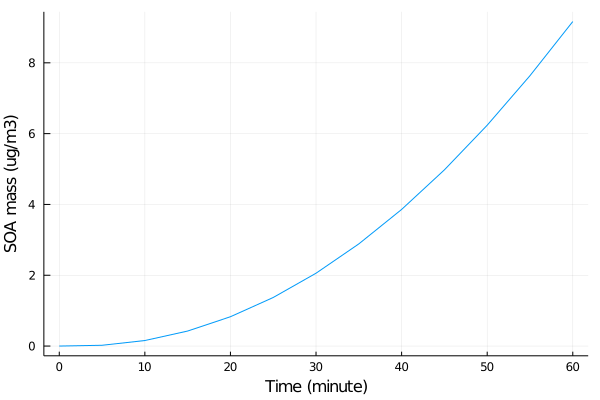

In [12]:
using Plots
plot(df_SOA[!,:Time]/60, df_SOA[!,:SOA], label = "")
xlabel!("Time (minute)")
ylabel!("SOA mass (ug/m3)")

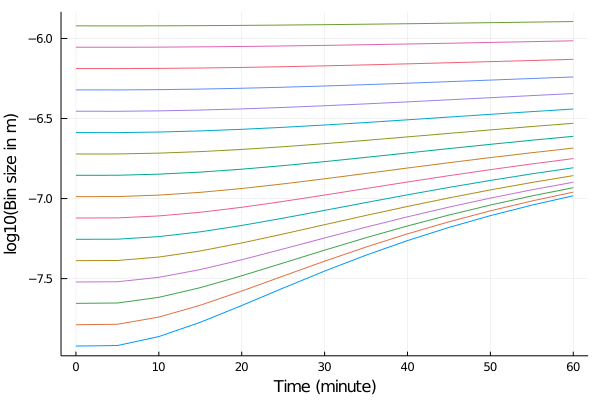

In [13]:
using Plots
plot(df_size[!,:Time]/60, log10.(Matrix(df_size[:,2:end])), label = "")
xlabel!("Time (minute)")
ylabel!("log10(Bin size in m)")